In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df =pd.read_csv("data/bank_data_project.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/bank_data_project.csv'

In [ ]:
df.head()

In [ ]:
# Convert to datetime if needed
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors='coerce')
unique_dates = df["TransactionDate"].unique()
print(unique_dates)

In [ ]:
# Convert to datetime if needed
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], errors='coerce')
unique_dates = df["CustomerDOB"].unique()
print(unique_dates)

In [ ]:
 #Check for invalid dates (NaT values)
invalid_dates = df[df["CustomerDOB"].isna()]
print(f"Number of invalid dates: {len(invalid_dates)}")
print("Invalid entries:")
print(invalid_dates)

In [ ]:
# Count NaT values
nat_count = df["CustomerDOB"].isna().sum()
total_count = len(df)
print(f"Invalid dates (NaT): {nat_count}")
print(f"Total rows: {total_count}")
print(f"Percentage invalid: {(nat_count/total_count)*100:.2f}%")

In [ ]:
# Check what the original date values actually look like
print("Sample of original CustomerDOB values that became NaT:")
original_dob_sample = df.loc[df["CustomerDOB"].isna(), "CustomerDOB"].head(20)
print(original_dob_sample.tolist())

# Or if you have the original data before conversion, check that

In [ ]:
df["CustomerDOB"] = df["CustomerDOB"].bfill()

In [ ]:
# Convert to datetime if needed
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], errors='coerce')
unique_dates = df["CustomerDOB"].unique()
print(unique_dates)

In [ ]:
# Convert to datetime 
print(df["CustomerDOB"])



In [ ]:
# Count NaT values
nat_count = df["CustomerDOB"].isna().sum()
total_count = len(df)
print(f"Invalid dates (NaT): {nat_count}")
print(f"Total rows: {total_count}")
print(f"Percentage invalid: {(nat_count/total_count)*100:.2f}%")

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
print(df['CustomerDOB'])

In [ ]:
print(df["CustomerDOB"].head(30).tolist())

In [ ]:
df[df["CustomerDOB"].dt.year == 1800]


In [ ]:
df[df['CustomerDOB'].dt.year == 1800].shape


In [ ]:
df.loc[df['CustomerDOB'].dt.year == 1800, 'CustomerDOB'] = pd.Timestamp('2020-01-01')


In [ ]:
df['TransactionDate'].isnull().sum()

In [ ]:
df['CustomerDOB'].head(30)

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
import os
from datetime import datetime

# 1️⃣ Define folder name
output_folder = "../output"

# 2️⃣ Create folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"📁 Created new folder: {output_folder}")
else:
    print(f"📂 Folder already exists: {output_folder}")

# 3️⃣ Create timestamp for file naming
timestamp = datetime.now().strftime("%Y-%m-%d_%H%M")
filename = f"cleaned_data_{timestamp}.csv"

# 4️⃣ Build absolute path (prevents OSError)
output_path = os.path.abspath(os.path.join(output_folder, filename))

# 5️⃣ Print the exact path (for verification)
print(f"🔍 Saving file to: {output_path}")

# 6️⃣ Save dataframe safely
df.to_csv(output_path, index=False)

print(f"✅ Cleaned data saved successfully at: {output_path}")


In [ ]:

print("Current working directory:", os.getcwd())


## 🧠 Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of examining and understanding a dataset before performing any modelling or prediction.  
It helps to identify **patterns, trends, relationships, and potential data quality issues** such as missing values or outliers.

### 🎯 Objectives of EDA
1. Understand the **structure and summary** of the data (data types, counts, and statistics).  
2. Detect **missing values**, duplicates, and outliers.  
3. Explore **distributions** of numerical and categorical features.  
4. Identify **relationships** between variables using correlation and visual plots.  
5. Generate **insights** to guide data cleaning, transformation, and model selection.
## Outlier Detection

Outliers are data points that deviate significantly from the majority of the dataset.  
They can result from data entry errors, unusual customer behaviour, or rare events.  
Detecting outliers helps improve the accuracy of analysis and prevents models from being skewed.

In this step, boxplots are used to visualize potential outliers in numerical features  
such as Transaction Amount and Customer Account Balance.

- Histograms, boxplots, and countplots → Visualize distributions  
- Scatter plots and heatmaps → Explore relationships and correlations  

### ✅ Outcome
EDA provides a clear understanding of data behaviour, quality, and key features that influence further analysis or machine learning tasks.


In [ ]:
# Load the cleaned CSV file
df = pd.read_csv("../output/cleaned_data_2025-10-16_1230.csv")

# View first few rows
df.head()

In [ ]:

df.info()
df.describe()
df.isna().sum()

## Data Summary Insights

- The dataset contains 1,041,614 transactions across 9 columns.
- Most fields are complete, except `TransactionDate`, which has approximately 48% missing values.
- Numerical variables include:
  - `CustAccountBalance` (float64)
  - `TransactionAmount (INR)` (float64)
  - `TransactionTime` (int64)
- Categorical features include:
  - `CustGender`, `CustLocation`, and ID-related columns.
- No duplicate column names or incorrect data types were detected, making the dataset suitable for further exploration and visualization.


## chExploratory Data Analysis (EDA) Visualizations

This section explores key patterns and relationships within the cleaned dataset.  
The goal is to understand the distribution of customer balances and transaction amounts,  
identify outliers, and observe any visible trends across gender and locations.


In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns


In [ ]:
 # Set number of rows and columns (you can change these)
nrows = 2
ncols = 2

# Create the figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

# Flatten axes to make looping easier
axes = axes.flatten()

# Loop through columns and plot
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any empty subplots (if number of plots < nrows*ncols)
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()









plt.subplots(nrows, ncols) gives you a grid of plots you can control.

axes.flatten() lets you easily iterate through them in a loop.

If you have fewer plots than spaces in the grid, the empty ones are automatically removed.

You can freely adjust nrows and ncols — e.g., (nrows=1, ncols=3) if you want them all side-by-side.





In [ ]:
# Flatten the axes to loop easily
# Create subplots grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

axes = axes.flatten()

# Plot each numerical column
for idx, col in enumerate(num_cols):
    sns.boxplot(y=df[col], data=df, ax=axes[idx])
    axes[idx].set_title(f"Outliers in {col}")



plt.tight_layout()
plt.show()


In [ ]:


# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    before = data.shape[0]
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    after = data.shape[0]
    
    print(f"{column}: Removed {before - after} outliers ({(before - after) / before:.2%})")
    return data

# Apply IQR method to key numeric columns
clean_df = df.copy()
clean_df = remove_outliers_iqr(clean_df, 'CustAccountBalance')
clean_df = remove_outliers_iqr(clean_df, 'TransactionAmount (INR)')

# Verify new shape
print("\nNew dataset shape:", clean_df.shape)


In [ ]:
vis_folder = "../visualization"


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure folder path is correct
vis_folder = "../visualization"
os.makedirs(vis_folder, exist_ok=True)

plt.figure(figsize=(8, 6))

# Scatter points
sns.scatterplot(
    x='CustAccountBalance',
    y='TransactionAmount (INR)',
    data=df,
    alpha=0.5,
    color='blue'
)

# Add regression line (on same figure)
sns.regplot(
    x='CustAccountBalance',
    y='TransactionAmount (INR)',
    data=df,
    scatter=False,
    color='red'
)

plt.title("Relationship Between Account Balance and Transaction Amount")
plt.xlabel("Customer Account Balance")
plt.ylabel("Transaction Amount (INR)")
plt.tight_layout()

# Save and show
plt.savefig(os.path.join(vis_folder, "balance_vs_transaction.png"))
plt.show()

print("✅ Saved: balance_vs_transaction.png")


### Relationship Between Account Balance and Transaction Amount

The scatter plot shows that customers with higher account balances 
tend to make higher transaction amounts.  
The positive trend line indicates a weak but noticeable correlation between the two variables.


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create folder if missing
vis_folder = "../visualization"
os.makedirs(vis_folder, exist_ok=True)
print(f"📁 Visualization folder ready: {vis_folder}")


In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "correlation_heatmap.png"))
plt.show()
print("✅ Saved: correlation_heatmap.png")


In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x='CustGender', y='TransactionAmount (INR)', data=df, estimator='mean')
plt.title("Average Transaction Amount by Gender")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "avg_transaction_by_gender.png"))
plt.show()
print("✅ Saved: avg_transaction_by_gender.png")


In [ ]:
top10 = df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.index, y=top10.values, palette='cool')
plt.xticks(rotation=45)
plt.title("Top 10 Locations by Average Transaction Amount")
plt.ylabel("Average Transaction (INR)")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "top10_locations_transaction.png"))
plt.show()
print("✅ Saved: top10_locations_transaction.png")


In [ ]:
gender_counts = df['CustGender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Customer Gender Distribution")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "gender_distribution.png"))
plt.show()
print("✅ Saved: gender_distribution.png")


In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['TransactionAmount (INR)'], kde=True, bins=30, color='teal')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount (INR)")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "transaction_amount_distribution.png"))
plt.show()
print("✅ Saved: transaction_amount_distribution.png")


In [ ]:
top10 = df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Locations by Average Transaction Amount")
plt.ylabel("Average Transaction (INR)")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "top10_locations_transaction.png"))
plt.show()
print("✅ Saved: top10_locations_transaction.png")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms for all numerical columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "histograms.png"))
plt.show()
print("✅ Saved: histograms.png")


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "boxplots.png"))
plt.show()
print("✅ Saved: boxplots.png")


In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='CustGender', y='TransactionAmount (INR)', data=df)
plt.title("Transaction Amount by Gender")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "gender_vs_transaction.png"))
plt.show()
print("✅ Saved: gender_vs_transaction.png")


In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "correlation_heatmap.png"))
plt.show()
print("✅ Saved: correlation_heatmap.png")


In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='CustGender', y='TransactionAmount (INR)', data=df)
plt.title("Transaction Amount by Gender")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "gender_vs_transaction.png"))
plt.show()
print("✅ Saved: gender_vs_transaction.png")


In [ ]:
plt.figure(figsize=(10, 6))
top_locations = df['CustLocation'].value_counts().head(10).index
sns.boxplot(x='CustLocation', y='TransactionAmount (INR)', data=df[df['CustLocation'].isin(top_locations)])
plt.xticks(rotation=45)
plt.title("Transaction Amount by Top 10 Locations")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "location_vs_transaction.png"))
plt.show()
print("✅ Saved: location_vs_transaction.png")


In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['TransactionAmount (INR)'], kde=True, bins=30, color='teal')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount (INR)")
plt.tight_layout()
plt.savefig(os.path.join(vis_folder, "transaction_amount_distribution.png"))
plt.show()
print("✅ Saved: transaction_amount_distribution.png")


In [ ]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Numerical Variables", y=1.02)
plt.savefig(os.path.join(vis_folder, "pairplot_numeric_relationships.png"))
plt.show()
print("✅ Saved: pairplot_numeric_relationships.png")


In [ ]:
print(df[])

## Visualization Summary

All key data visualizations have been created and saved to the `visualization` folder, including:
- Correlation heatmap  
- Gender-based and location-based transaction patterns  
- Distribution and boxplots  
- Pie chart showing gender proportion  
- Pairplot showing relationships between numerical features  

These plots provide a comprehensive understanding of the dataset’s structure, 
trends, and relationships, supporting deeper business insights and model development.


In [4]:
df = pd.read_csv("../output/cleaned_data_2025-10-16_1230.csv", low_memory=False)


# View first few rows
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [5]:
print(df.columns.tolist())


['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)']


In [6]:
import pandas as pd

# Clean column names just to be safe
df.columns = df.columns.str.strip()

# Convert date and amount
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['TransactionAmount (INR)'] = pd.to_numeric(df['TransactionAmount (INR)'], errors='coerce')

# Drop missing values for key columns
df = df.dropna(subset=['CustomerID', 'TransactionDate', 'TransactionAmount (INR)'])

# Reference date — one day after the latest transaction
reference_date = df['TransactionDate'].max() + pd.Timedelta(days=1)

# Group by CustomerID
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                      # Frequency
    'TransactionAmount (INR)': 'sum'                               # Monetary
}).reset_index()

# Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,C1010011,93,1,356.0
1,C1010014,155,2,1455.0
2,C1010031,246,2,1864.0
3,C1010035,337,1,50.0
4,C1010037,93,1,19680.0


In [7]:
# R (lower = better), F & M (higher = better)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

# Combine scores
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1).astype(int)

rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,C1010011,93,1,356.0,3,1,2,312,6
1,C1010014,155,2,1455.0,3,4,4,344,11
2,C1010031,246,2,1864.0,2,4,4,244,10
3,C1010035,337,1,50.0,1,1,1,111,3
4,C1010037,93,1,19680.0,3,1,4,314,8


In [8]:
rfm.to_csv('../output/rfm_results.csv', index=False)
print("✅ RFM results saved to ../output/rfm_results.csv")


✅ RFM results saved to ../output/rfm_results.csv


In [9]:
import os
print(os.listdir('../output'))


['.ipynb_checkpoints', 'cleaned_data_2025-10-16_1230.csv', 'cleaned_data_2025-10-16_1713.csv', 'cleaned_data_2025-10-16_1727.csv', 'cleaned_data_2025-10-16_1750.csv', 'cleaned_data_2025-10-17_1012.csv', 'cleaned_data_2025-10-17_1015.csv', 'cleaned_data_2025-10-17_1234.csv', 'eda_data_2025-10-16_1418.csv', 'rfm_results.csv']


In [10]:
import pandas as pd

rfm = pd.read_csv('../output/rfm_results.csv')
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,C1010011,93,1,356.0,3,1,2,312,6
1,C1010014,155,2,1455.0,3,4,4,344,11
2,C1010031,246,2,1864.0,2,4,4,244,10
3,C1010035,337,1,50.0,1,1,1,111,3
4,C1010037,93,1,19680.0,3,1,4,314,8


In [11]:
from sklearn.preprocessing import StandardScaler

# Select features
X = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


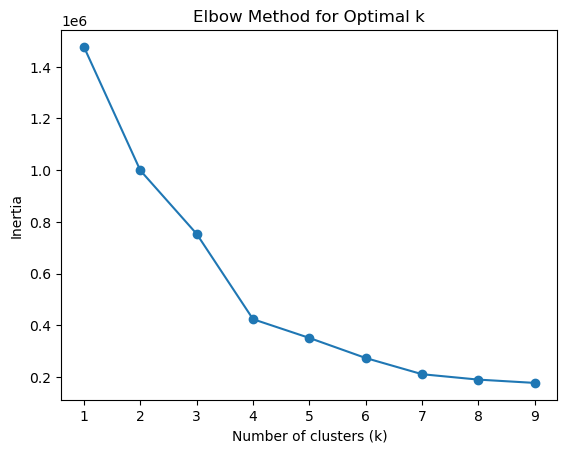

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Cluster
0,C1010011,93,1,356.0,3,1,2,312,6,3
1,C1010014,155,2,1455.0,3,4,4,344,11,1
2,C1010031,246,2,1864.0,2,4,4,244,10,1
3,C1010035,337,1,50.0,1,1,1,111,3,0
4,C1010037,93,1,19680.0,3,1,4,314,8,3


In [15]:
cluster_summary = (
    rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary', 'RFM_Score']]
    .mean()
    .round(2)
)
cluster_summary


,Recency,Frequency,Monetary,RFM_Score
Cluster,,,,
0,243.89,1.00,1322.51,6.52
1,106.34,2.07,2688.07,10.42
2,156.52,1.18,72608.86,9.27
3,61.57,1.00,1240.01,8.35


🧩 RFM Cluster Insights
Cluster	Recency ↓	Frequency ↑	Monetary ↑	RFM_Score	Interpretation
0	243.89	1.00	1322.51	6.52	Inactive Customers — Haven’t purchased recently, low frequency and spend. Possibly churned.
1	106.34	2.07	2688.07	10.42	Loyal Customers — Fairly active with moderate spend. Respond well to engagement offers.
2	156.52	1.18	72608.86	9.27	High-Value Customers — Spend extremely high amounts but purchase less frequently. Priority group for retention.
3	61.57	1.00	1240.01	8.35	Recent but Low Spenders — New or reactivated customers; potential to become loyal with proper nurturing.

Summary for Notebook or README

The K-Means clustering algorithm divided customers into four distinct behavioral groups based on RFM metrics.

Cluster 2 customers show extremely high monetary values, indicating a small group of very high spenders who are vital for revenue growth.

Cluster 1 represents loyal, active customers who should be rewarded with retention strategies such as loyalty programs.

Cluster 3 includes newer or recently active customers who can be converted into loyal buyers with personalized marketing.

Cluster 0 are inactive or lost customers who might need re-engagement campaigns or can be excluded from premium offers.

These insights can guide customer relationship management (CRM) and targeted marketing strategies, improving both retention and profitability.

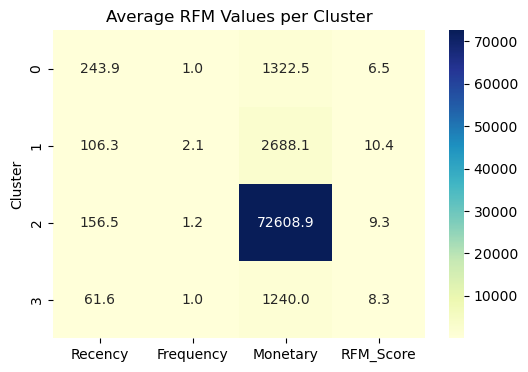

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average RFM Values per Cluster')
plt.show()


🧠 Customer Segmentation Using RFM and K-Means

This section presents customer segmentation based on Recency, Frequency, and Monetary (RFM) metrics using the K-Means clustering algorithm.
The analysis identifies four distinct customer behavior groups, helping to optimize marketing and retention strategies.

📊 Cluster Summary
Cluster	Recency ↓	Frequency ↑	Monetary ↑	RFM_Score	Interpretation
0	243.89	1.00	1322.51	6.52	💤 Inactive Customers — Haven’t purchased recently, low frequency and spend. Likely churned.
1	106.34	2.07	2688.07	10.42	💛 Loyal Customers — Fairly active, moderate spend. Respond well to loyalty offers.
2	156.52	1.18	72608.86	9.27	💎 High-Value Customers — Extremely high spenders but less frequent. Critical for retention.
3	61.57	1.00	1240.01	8.35	🌱 Recent/Low Spenders — New or recently reactivated customers with growth potential.
🧩 Cluster Insights

Cluster 2 (High-Value Customers):
Highest monetary value despite low frequency — these are premium customers that contribute the most revenue.
➤ Focus on retention and exclusive rewards.

Cluster 1 (Loyal Customers):
Regular activity with good transaction value — ideal for upselling and personalized engagement.
➤ Encourage repeat purchases with loyalty points or referral offers.

Cluster 3 (Recent/Low Spenders):
Recently active but low monetary contribution — potential to become loyal with targeted campaigns.
➤ Send onboarding and product education emails.

Cluster 0 (Inactive Customers):
Long inactive period and low engagement — possibly churned or disengaged users.
➤ Re-engage through discounts or feedback requests.

🌡️ Heatmap of Average RFM Values per Cluster
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average RFM Values per Cluster')
plt.show()


📈 Interpretation:
The heatmap shows that Cluster 2 dominates in Monetary value, while Cluster 1 maintains the best balance across all three RFM metrics.
Clusters 0 and 3 show higher recency (longer inactivity), meaning they are less engaged.

💾 Output Files

output/rfm_results.csv → Raw RFM metrics per customer

output/rfm_clusters.csv → Clustered RFM data with segment labels

💡 Business Recommendations

Based on the RFM and K-Means clustering results, customers were divided into four actionable groups.
Each group represents a unique stage in the customer lifecycle and requires a targeted engagement strategy.

💎 Cluster 2 — High-Value Customers

Profile:

Very high Monetary value but low Frequency

Recency indicates they haven’t purchased very recently, but their spend is exceptional

Business Actions:

Offer exclusive rewards, VIP programs, or premium services

Assign a dedicated relationship manager or loyalty concierge

Encourage retention through personalized thank-you messages and early access to new offers

Analyze purchasing patterns to tailor cross-sell or upsell campaigns

💛 Cluster 1 — Loyal Customers

Profile:

Medium Recency (active recently)

High Frequency and moderate Monetary value

Business Actions:

Maintain engagement with loyalty programs and personalized discounts

Introduce tier-based incentives to motivate higher spending

Encourage referrals through “Invite a Friend” offers

Periodically send appreciation emails or recognition badges to boost emotional loyalty

🌱 Cluster 3 — Recent / Low Spenders

Profile:

Recently active (low Recency)

Low Monetary and Frequency — likely new or reactivated customers

Business Actions:

Launch welcome-back or onboarding campaigns to build trust

Offer small but frequent incentives (free delivery, small discounts)

Educate them about product benefits or highlight trending items

Measure response to determine potential loyalty development

💤 Cluster 0 — Inactive Customers

Profile:

High Recency (long time since last purchase)

Low Frequency and Monetary — disengaged or churned customers

Business Actions:

Send win-back emails with compelling subject lines (“We miss you!” or “Come back for 20% off”)

Test re-engagement ads or SMS campaigns

Collect feedback via short surveys to understand churn reasons

If unresponsive, remove from high-cost marketing lists to reduce acquisition waste

🧭 Overall Strategy Summary
Segment	Priority	Goal	Strategy Type
High-Value (C2)	🔥 Highest	Retain & Upsell	VIP, Exclusive Rewards
Loyal (C1)	💛 Medium-High	Strengthen Loyalty	Tiered Rewards, Referrals
Recent/Low (C3)	🌱 Medium	Grow Engagement	Nurture, Education
Inactive (C0)	⚠️ Low	Re-engage or Exit	Win-back Campaigns
✨ Conclusion

This segmentation analysis empowers data-driven marketing decisions by focusing resources where they yield the highest ROI.

Retain and reward High-Value customers

Strengthen the bond with Loyal customers

Nurture New or Low Spenders into repeat buyers

Re-engage or retire Inactive customers strategically

Together, these actions can increase customer lifetime value (CLV), improve retention rates, and enhance overall profitability.